<a href="https://colab.research.google.com/github/loganhooker02/hookermachinelearning/blob/main/assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
#ECGR 5105 HW 2
#By Logan Hooker

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
from sklearn.model_selection import train_test_split
#import dataset
url = 'Housing.csv'

In [139]:
#read csv into a dataframe
housing = pd.read_csv(url)
#check for matrix size and null values


In [140]:
#Problem 1 Preproccessing without normalization/standardization
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x): #turn yes into 1, no into 0
    return x.map({'yes': 1, 'no': 0})

# Applying function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [141]:
np.random.seed(0)
# split the dataset into the Training set and Validation set, set 20% as validation
train, val = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)
train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,8645000,8050,3,1,1,1,1,1,0,1,1,0,furnished
41,7840000,6360,3,2,4,1,0,0,0,1,0,1,furnished
91,6419000,6750,2,1,1,1,1,1,0,0,2,1,furnished
118,5950000,6420,3,1,1,1,0,1,0,1,0,1,furnished
472,3010000,3630,4,1,2,1,0,0,0,0,3,0,semi-furnished


In [142]:
def gradient_descent(train, test, price_train, price_test, alpha, theta, iterations):
    train_losses = []
    val_losses = []

    for iteration in range(iterations):
        gradients = 2/(len(train)) * train.T.dot(train.dot(theta) - price_train)
        theta = theta - alpha * gradients

        train_loss = (1/len(train)) * np.sum(np.square(train.dot(theta) - price_train))
        val_loss = (1/len(test)) * np.sum(np.square(test.dot(theta) - price_test))

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return theta, train_losses, val_losses

In [153]:
#create column vectors
train_price = train.values[:,0]
val_price = val.values[:,0]
#add few necessary variables
theta_a = np.zeros(6)
theta_b = np.zeros(12)
iterations = 1500
#length of frames
train_len = len(train_price)
val_len = len(val_price)

alpha_values = [0.1, 0.05, 0.01, 0.0000000001]  # Learning rates


#Part A uses area, bedrooms, bathrooms, stories, parking
vars_a = ['area','bedrooms','bathrooms','stories','parking']
train_a = np.c_[np.ones((train_len, 1)), train[vars_a]]
val_a = np.c_[np.ones((val_len, 1)), val[vars_a]]


#Part B uses area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea
vars_b = ['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']
train_b = np.c_[np.ones((len(train_price), 1)), train[vars_b]]
val_b = np.c_[np.ones((len(val_price),1)), val[vars_b]]


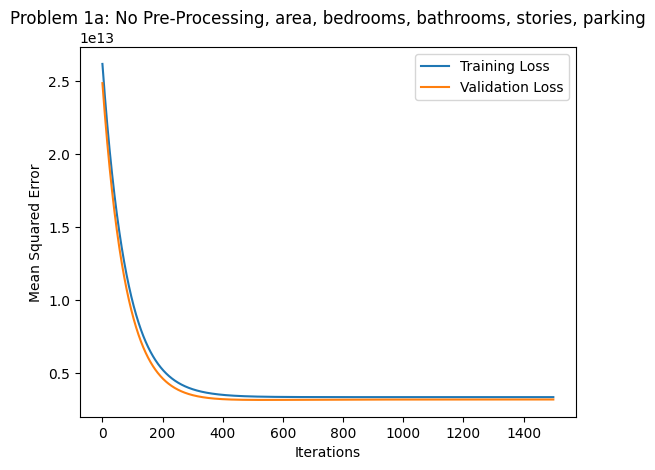

3380215953779.0186

3189411448215.3936

190804505563.625

In [144]:
#Problem 1a


alpha_1a = 0.0000000001
theta_a = np.zeros(6)
theta_a, train_losses_1a, val_losses_1a = gradient_descent(train_a, val_a, train_price, val_price, alpha_1a, theta_a, iterations)
plt.plot(train_losses_1a, label="Training Loss")
plt.plot(val_losses_1a, label="Validation Loss")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Problem 1a: No Pre-Processing, area, bedrooms, bathrooms, stories, parking")
plt.show()

display(min(train_losses_1a))
display(min(val_losses_1a))
display(abs(min(train_losses_1a)-min(val_losses_1a)))

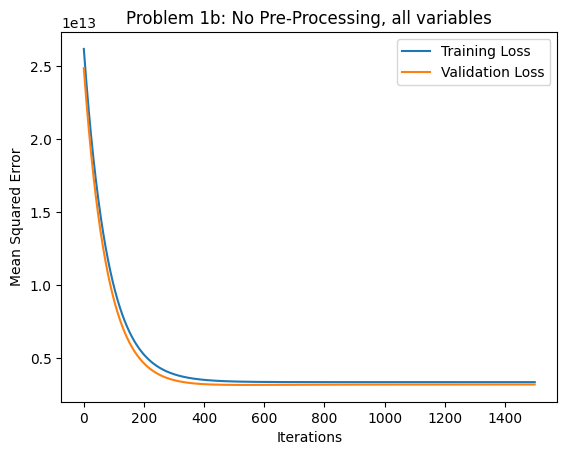

3380215631548.579

3189411190906.83

190804440641.74902

In [145]:
#Problem 1b
theta_b = np.zeros(12)
alpha_1b = 0.0000000001
theta_b, train_losses_1b, val_losses_1b = gradient_descent(train_b, val_b, train_price, val_price, alpha_1b, theta_b, iterations)
plt.plot(train_losses_1b, label="Training Loss")
plt.plot(val_losses_1b, label="Validation Loss")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Problem 1b: No Pre-Processing, all variables")
plt.show()

display(min(train_losses_1b))
display(min(val_losses_1b))
display(abs(min(train_losses_1b)-min(val_losses_1b)))